In [1]:
cd /v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/bows+punctuation/

/v/filer4b/v20q001/ebanner/Classes/nlp/Project/irony-classifier/data/conservative/features/bows+punctuation


# Load Comments 

In [2]:
import pickle
import scipy
import numpy as np

with open('features.p', 'r') as f:
    data = pickle.load(f)
    
with open('vectorizer.p', 'r') as f:
    vectorizer = pickle.load(f)

In [3]:
# Load comments, labels, and bow vectors
xs = np.array([ comment for comment in sorted(data) ])
ys = np.array([ data[comment]['label'] for comment in sorted(data) ])

X = scipy.sparse.vstack([ data[comment]['bow'] for comment in sorted(data) ])

# 5-Fold Test

In [25]:
from sklearn.cross_validation import KFold

kf = KFold(len(xs), n_folds=5, shuffle=True)

# Predictions

In [46]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDClassifier

recalls, precisions, f_measures = [], [], []
for train, test in kf:
    # Train svm
    svm = SGDClassifier(loss="hinge", penalty="l2", class_weight="auto", alpha=.01)
    parameters = { 'alpha': [.001, .01,  .1] }
    clf = GridSearchCV(svm, parameters, scoring='f1')
    clf.fit(X[train], ys[train])

    # Make predictions
    predictions = clf.predict(X[test])
    
    for test, vector, prediction, actual in zip(xs[test], X[test], predictions, ys[test]):
        print '========================================================================'
        print
        print 'Comment: {}'.format(test)
        print 'Vectorized as: {}'.format(vector)
        print 'Prediction: {}'.format(prediction)
        print 'Was really: {}'.format(actual)
        print


Comment: "Alarmism" Really?  How many -isms do you have to make up? PUNCxQUESTION_MARK
Vectorized as:   (0, 16236)	1
  (0, 13820)	1
  (0, 22298)	1
  (0, 1490)	1
  (0, 13819)	1
  (0, 1488)	1
  (0, 22271)	1
  (0, 16186)	1
  (0, 21707)	1
Prediction: 1
Was really: -1


Comment: "You can only ride our backs for so long before we’re going to tell you enough is enough. "

Facepalm.  I don't get it, all democrats think at their core like a republican, but being democrat is too hip and cool they just can't see through it.
Vectorized as:   (0, 5865)	1
  (0, 12333)	1
  (0, 7037)	1
  (0, 22943)	1
  (0, 15499)	1
  (0, 5895)	1
  (0, 27207)	1
  (0, 7124)	1
  (0, 8006)	1
  (0, 9380)	1
  (0, 26909)	1
  (0, 10889)	1
  (0, 15845)	1
  (0, 2509)	1
  (0, 23324)	1
  (0, 5862)	1
  (0, 12332)	1
  (0, 5889)	1
  (0, 9379)	1
  (0, 26903)	1
  (0, 23323)	1
  (0, 7031)	1
  (0, 22938)	1
  (0, 2508)	1
  (0, 15837)	1
  (0, 27176)	1
  (0, 14134)	1
  (0, 10804)	1
  (0, 15377)	1
  (0, 7066)	1
  (0, 7985)	1
Prediction: -1

# Most Indicative Features

In [115]:
sgd_clf = clf.best_estimator_
feat_names = vectorizer.get_feature_names()
coefs_with_fns = sorted(zip(sgd_clf.coef_[0], feat_names))
coefs_with_fns[:20]

[(-0.34189188904002044, u'conservative'),
 (-0.29825540033038128, u'http'),
 (-0.29738267055618856, u'sad'),
 (-0.29236447435458024, u'good'),
 (-0.28843719037071269, u'going'),
 (-0.2834189941691041, u'point'),
 (-0.25832801316106191, u'race'),
 (-0.25636437116912825, u'senate'),
 (-0.2550552765078391, u'new'),
 (-0.25025526274977872, u'history'),
 (-0.2496007154191342, u'post'),
 (-0.24283705966913999, u'time'),
 (-0.24218251233849558, u'surprised'),
 (-0.23694613369333856, u'article'),
 (-0.23432794437076032, u've'),
 (-0.23149157260463402, u'problem'),
 (-0.22843701839495908, u'government'),
 (-0.22603701151592917, u'schools'),
 (-0.22603701151592911, u'men'),
 (-0.22407336952399554, u'conservatives')]

In [116]:
coefs_with_fns[-20:]

[(0.22385518708044727, u'soon'),
 (0.22429155196754386, u'money'),
 (0.2264733764030257, u'tea'),
 (0.2277824710643149, u'guys'),
 (0.22843701839495947, u'try'),
 (0.22974611305624887, u'guess'),
 (0.23389157948366429, u'sandwich'),
 (0.23629158636269443, u'black'),
 (0.24130978256430283, u'everybody'),
 (0.2493825329755861, u'lose'),
 (0.24938253297558613, u'numbers'),
 (0.25069162763687514, u'haven'),
 (0.25134617496751982, u'ones'),
 (0.25396436429009811, u'yeah'),
 (0.25701891849977332, u'sure'),
 (0.25767346583041767, u'need'),
 (0.28014625751588157, u'll'),
 (0.34472826080614705, u'course'),
 (0.3706919715883823, u'racist'),
 (0.47607409182216087, u'puncxexclamation_point')]

# Performance

## Byron's Results: Precision=0.315 (0.261, 0.380), Recall=0.496 (0.446, 0.548), F-Measure=0.383 (0.330, 0.412)

In [112]:
import sklearn

precisions, recalls, f_measures = [], [], []
for train, test in kf:
    # Train svm
    svm = SGDClassifier(loss="hinge", penalty="l2", class_weight="auto")
    parameters = { 'alpha': [.001, .01,  .1] }
    clf = GridSearchCV(svm, parameters, scoring='f1')
    clf.fit(X[train], ys[train])

    # Make predictions
    predictions = clf.predict(X[test])
    
    # Record statistics
    precision, recall, f_measure, _ = sklearn.metrics.precision_recall_fscore_support(ys[test], predictions, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f_measures.append(f_measure)

print 'Precisions: {}'.format(precisions)
print 'Recalls: {}'.format(recalls)
print 'F-Measures: {}'.format(f_measures)
print
print 'Mean Precision: {}'.format(np.mean(precisions))
print 'Mean Recall: {}'.format(np.mean(recalls))
print 'Mean F-Measure: {}'.format(np.mean(f_measures))

Precisions: [0.32575757575757575, 0.27906976744186046, 0.35294117647058826, 0.33898305084745761, 0.30681818181818182]
Recalls: [0.56578947368421051, 0.48648648648648651, 0.47999999999999998, 0.56338028169014087, 0.375]
F-Measures: [0.41346153846153844, 0.35467980295566509, 0.40677966101694912, 0.42328042328042326, 0.33749999999999997]

Mean Precision: 0.320713950467
Mean Recall: 0.494131248372
Mean F-Measure: 0.387140285143


# Learning Curves

In [88]:
import sklearn

rows, performances = (np.shape(X[train])[0], {})
ms = range(100, rows, 100) + [rows]  # ms = (1, 100, 200, ..., 1200, 1229)
for m in ms:
    
    precisions, recalls, f_measures = [], [], []
    for train, test in kf:
        # Train svm
        svm = SGDClassifier(loss="hinge", penalty="l2", class_weight="auto")
        parameters = { 'alpha': [.001, .01,  .1] }
        clf = GridSearchCV(svm, parameters, scoring='f1')
        clf.fit(X[train[:m]], ys[train[:m]])

        # Make predictions
        predictions = clf.predict(X[test])

        # Record statistics
        precision, recall, f_measure, _ = sklearn.metrics.precision_recall_fscore_support(ys[test], predictions, average='binary')
        precisions.append(precision)
        recalls.append(recall)
        f_measures.append(f_measure)

    performances[m] = (np.mean(precisions), np.mean(recalls), np.mean(f_measures))

/u/ebanner/.virtualenvs/lab-2.7/local/lib/python2.7/site-packages/sklearn/metrics/classification.py:958: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [89]:
precisions = [ performances[m][0] for m in sorted(performances) ]
recalls =    [ performances[m][1] for m in sorted(performances) ]
f_measures = [ performances[m][2] for m in sorted(performances) ]

# Plot

In [90]:
%matplotlib inline

import matplotlib.pyplot as plt

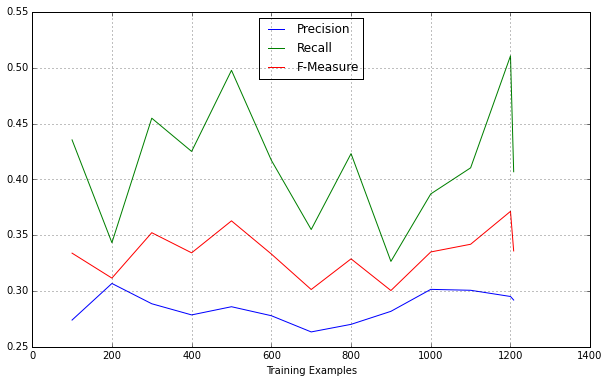

In [91]:
fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(111)

labels = ['Precision', 'Recall', 'F-Measure']
metrics = [precisions, recalls, f_measures]

for metric, label in zip(metrics, labels):
    axes.plot(ms, metric, label=label)
    
plt.xlabel('Training Examples')
plt.grid(True)

axes.legend(loc='upper center')

plt.show()